# Aviation Accident Analysis

  ## 1. Business Understanding

  ### 1.1 Problem Statement

A company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.

The task is determining which aircrafts are the lowest risk for the company to start this new business endeavor. The findings should then be translated into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

  ### 1.2 Goal

The goal of this project is to use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder who is interested in purchasing and operating airplanes for commercial and private enterprises.

The aim is therefore to translate the findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

  ### 1.3 Objectives

  ### Main Objective

To identify the aircrafts that are less prone to be involved in an aviation accident. This will help the head of the new aviation division to decide which aircraft to purchase and operate for commercial and private enterprises.

  ### Specific Objectives

1. To understand the problem statement, the goal and dataset used in the project.
2. To use various data cleaning techniques in order to make actionable insights.
3. To analyse the data by both univariate and bivariate analysis for the various variables.

  ### 1.4 Data Description

The data used is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## 2. Data Understanding

### 2.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import warnings
warnings.filterwarnings("ignore")

### 2.2 Loading Datasets

In [2]:
Aviation_Data = pd.read_csv('AviationData.csv', encoding='latin1')

### 2.3 Dataset Exploration

In [3]:
Aviation_Data.shape

(88889, 31)

The data has 88,889 rows and 31 columns.

In [4]:
Aviation_Data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
Aviation_Data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
Aviation_Data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
Aviation_Data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
Aviation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

5 of the columns contains float values and the other 26 columns are strings. The DataFrame has some missing values, indicated by the "Non-Null Count" column.

### 2.4 Missing Values

In [9]:
Aviation_Data.isnull().sum().sum()

564742

There are 564,742 missing values. To check the percentage of missing values in each column a formula will be used:

In [10]:
def identify_missing_values(data):
    """A simple function to check if data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)*100

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing

missing_data = identify_missing_values(Aviation_Data)
missing_data

,Missing Values,Percentage(%)
Schedule,76307,85.845268
Air.carrier,72241,81.271023
FAR.Description,56866,63.974170
Aircraft.Category,56602,63.677170
Longitude,54516,61.330423
Latitude,54507,61.320298
Airport.Code,38640,43.469946
Airport.Name,36099,40.611324
Broad.phase.of.flight,27165,30.560587
Publication.Date,13771,15.492356


### 2.5 Duplicates

In [11]:
duplicates = Aviation_Data.duplicated()
print(duplicates.sum())

0


There are no duplicates in the dataset.

## 3. Data Preparation

### 3.1 Handling Missing Values

In [12]:
missing_data = identify_missing_values(Aviation_Data)
missing_data

,Missing Values,Percentage(%)
Schedule,76307,85.845268
Air.carrier,72241,81.271023
FAR.Description,56866,63.974170
Aircraft.Category,56602,63.677170
Longitude,54516,61.330423
Latitude,54507,61.320298
Airport.Code,38640,43.469946
Airport.Name,36099,40.611324
Broad.phase.of.flight,27165,30.560587
Publication.Date,13771,15.492356


#### Imputation

These columns cannot be dropped because they are important for the analysis. Imputation will be used to deal with the missing values in these columns.

In [13]:
fill_rows = ['Air.carrier', 'FAR.Description', 'Purpose.of.flight', 'Engine.Type', 'Broad.phase.of.flight']
rows_to_fill = [fill for fill in fill_rows if fill in Aviation_Data.columns]
Aviation_Data[rows_to_fill] = Aviation_Data[rows_to_fill].fillna(value='None')

#### Dropping Rows

Rows where columns with missing values are below 15% will be dropped as most of the data will still be retained.

In [14]:
Drop_rows = ['Total.Fatal.Injuries','Total.Uninjured','Total.Minor.Injuries','Aircraft.damage','Total.Setrious.Injuries',
             'Injury.Severity','Location', 'Country', 'Make', 'Model', 'Amateur.Built','Weather.Condition', 
             'Number.of.Engines','Total.Serious.Injuries','Aircraft.Category']
rows_to_drop = [row for row in Drop_rows if row in Aviation_Data.columns]
Aviation_Data = Aviation_Data.dropna(subset=rows_to_drop)

#### Dropping Columns

Columns with missing values that will not be used in the analysis are dropped.

In [15]:
Drop_Columns = ['Latitude', 'Longitude', 'Schedule','Registration.Number', 'Publication.Date', 'Airport.Name', 
                'Airport.Code', 'Report.Status']
columns_to_drop = [col for col in Drop_Columns if col in Aviation_Data.columns]
Aviation_Data = Aviation_Data.drop(columns_to_drop, axis=1)

In [16]:
missing_data = identify_missing_values(Aviation_Data)
missing_data

,Missing Values,Percentage(%)


In [17]:
Aviation_Data.isnull().sum().sum()

0

There are no missing values in the dataset.

In [18]:
Aviation_Data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

In [19]:
Aviation_Data.shape

(23069, 23)

The dataset has 23,069 rows and 23 columns.

### 3.2 Handling Duplicates

In [20]:
duplicates = Aviation_Data.duplicated()
print(duplicates.sum())

1


One row has duplicate values

In [21]:
Aviation_Data.drop_duplicates(inplace=True)

In [22]:
duplicates = Aviation_Data.duplicated()
print(duplicates.sum())

0


In [23]:
Aviation_Data.shape

(23068, 23)

After removing the duplicate row the dataset has 23,068 rows and 23 columns.

### 3.3 Type Conversion

In [24]:
Aviation_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23068 entries, 7 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                23068 non-null  object 
 1   Investigation.Type      23068 non-null  object 
 2   Accident.Number         23068 non-null  object 
 3   Event.Date              23068 non-null  object 
 4   Location                23068 non-null  object 
 5   Country                 23068 non-null  object 
 6   Injury.Severity         23068 non-null  object 
 7   Aircraft.damage         23068 non-null  object 
 8   Aircraft.Category       23068 non-null  object 
 9   Make                    23068 non-null  object 
 10  Model                   23068 non-null  object 
 11  Amateur.Built           23068 non-null  object 
 12  Number.of.Engines       23068 non-null  float64
 13  Engine.Type             23068 non-null  object 
 14  FAR.Description         23068 non-null

In [25]:
Int_Conversion = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
                  'Total.Uninjured' ]
for column in Int_Conversion:
    Aviation_Data[column] = Aviation_Data[column].astype(int)

In [26]:
# Format the date into the pandas date format
Aviation_Data['Event.Date'] = pd.to_datetime(Aviation_Data['Event.Date'])

In [27]:
Aviation_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23068 entries, 7 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                23068 non-null  object        
 1   Investigation.Type      23068 non-null  object        
 2   Accident.Number         23068 non-null  object        
 3   Event.Date              23068 non-null  datetime64[ns]
 4   Location                23068 non-null  object        
 5   Country                 23068 non-null  object        
 6   Injury.Severity         23068 non-null  object        
 7   Aircraft.damage         23068 non-null  object        
 8   Aircraft.Category       23068 non-null  object        
 9   Make                    23068 non-null  object        
 10  Model                   23068 non-null  object        
 11  Amateur.Built           23068 non-null  object        
 12  Number.of.Engines       23068 non-null  int32 

### 3.4 Data Consistency

In [28]:
# Get a list of unique values in the 'Make' column
unique_makes = Aviation_Data['Make'].unique()

print("Unique makes:", unique_makes)

Unique makes: ['Cessna' 'Bellanca' 'Navion' ... 'CHILDS MICHAEL  A' 'GREG HOBBS'
 'ORLICAN S R O']


In [29]:
# Convert 'Make' column to lowercase and then capitalize the first letter
Aviation_Data['Make'] = Aviation_Data['Make'].str.lower().str.capitalize()

In [30]:
# Get a list of unique values in the 'Weather.Condition' column
unique_makes = Aviation_Data['Weather.Condition'].unique()

print("Unique makes:", unique_makes)

Unique makes: ['VMC' 'IMC' 'UNK' 'Unk']


In [31]:
# Convert 'Weather.Condition'' column to lowercase and then capitalize the first letter
Aviation_Data['Weather.Condition'] = Aviation_Data['Weather.Condition'].str.upper()

In [32]:
Aviation_Data.to_excel('C:\\Users\\25479\\Downloads\\Aviation_Data.xlsx', index=False)


## 4. Exploratory Data Analysis

### 4.1 Univariate Analysis

### a) Event Month

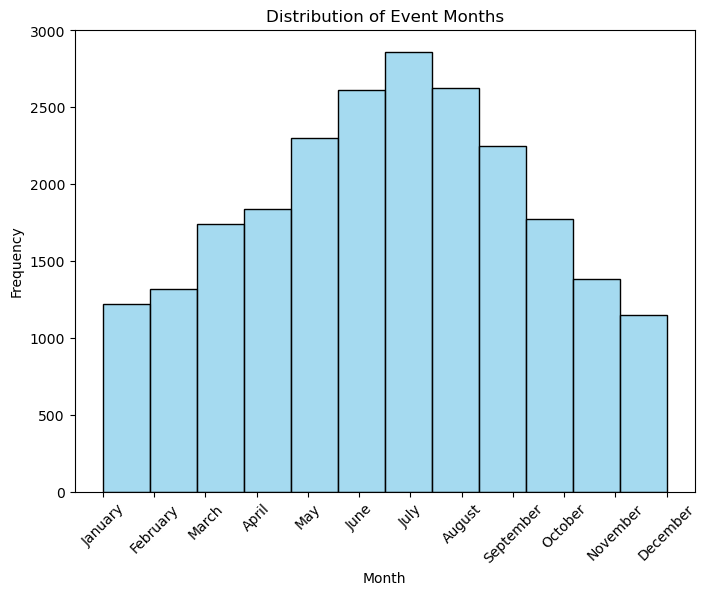

<Figure size 640x480 with 0 Axes>

In [33]:
# Convert 'Event.Date' to months
Aviation_Data['Month'] = Aviation_Data['Event.Date'].dt.month

# Create a histogram
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=Aviation_Data, x='Month', color='skyblue', bins=12)

# Set the x-axis labels to full month names
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_name[i] for i in range(1, 13)], rotation=45) 

plt.title('Distribution of Event Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

plt.savefig('Distribution of Event Months.png');

Most of the accidents happen between June, July and August. This can be attributed to the season of summer where most people are on holidays and are travelling more.

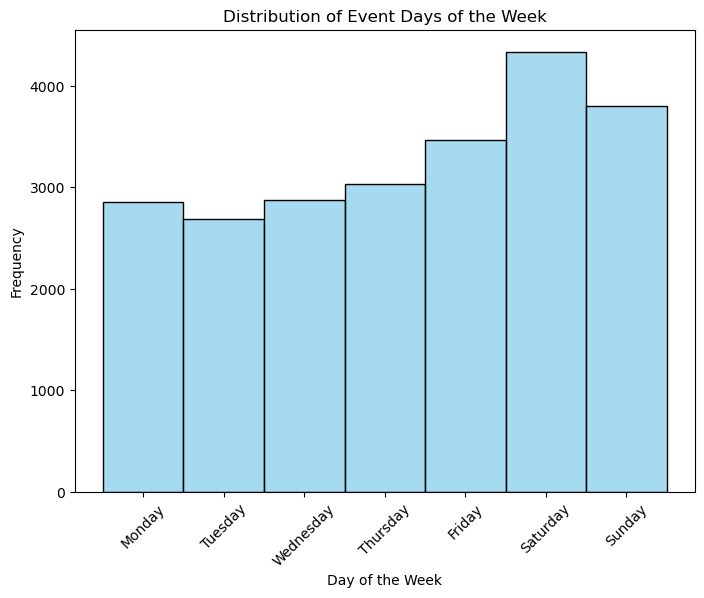

<Figure size 640x480 with 0 Axes>

In [34]:
# Extract the day of the week from the 'Event.Date' column
Aviation_Data['Day_of_Week'] = Aviation_Data['Event.Date'].dt.day_name()

# Specify the order of days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the data by the order of days_of_week
Aviation_Data['Day_of_Week'] = pd.Categorical(Aviation_Data['Day_of_Week'], categories=days_of_week, ordered=True)

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=Aviation_Data, x='Day_of_Week', color='skyblue', bins=7, discrete=True)
plt.title('Distribution of Event Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Distribution of Event Days.png');

Most of the accidents also happen between Friday, Saturday and Sunday. This can be attributed to the weekend where most people are also travelling more.

### b) Aircraft Category

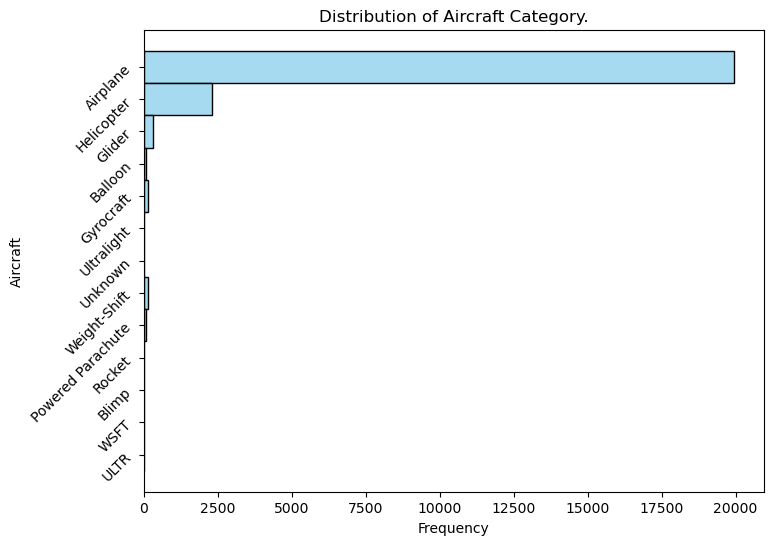

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=Aviation_Data, y='Aircraft.Category', color='skyblue', bins=15)
plt.title('Distribution of Aircraft Category.')
plt.xlabel('Frequency')
plt.ylabel('Aircraft')
plt.yticks(rotation=45)
plt.show()

plt.savefig('Distribution of Aircraft Category.png');

Airplanes are more prone to accidents whereby Helicopters, Gliders and Gyrocraft are less likely to be in accidents.

### c) Make

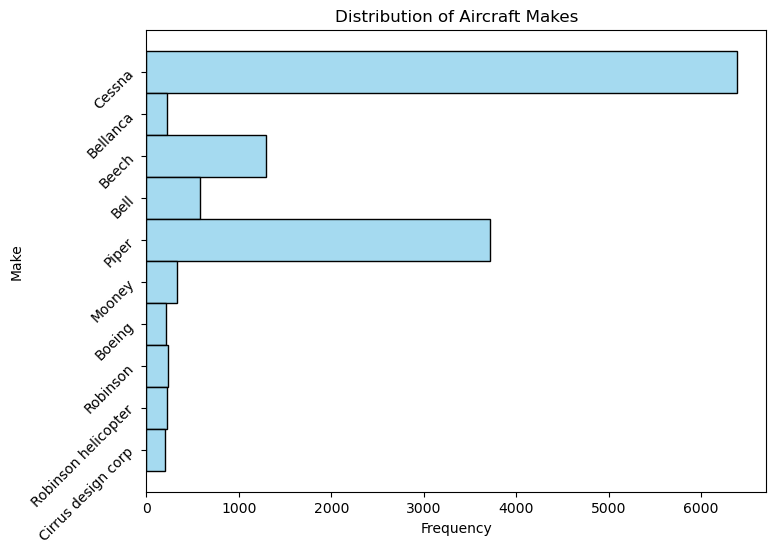

<Figure size 640x480 with 0 Axes>

In [36]:
# Get the top 10 makes
top_10_makes = Aviation_Data['Make'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 makes
top_10_data = Aviation_Data[Aviation_Data['Make'].isin(top_10_makes)]

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=top_10_data, y='Make', color='skyblue', bins=10)
plt.title('Distribution of Aircraft Makes')
plt.xlabel('Frequency')
plt.ylabel('Make')
plt.yticks(rotation=45)
plt.show()

plt.savefig('Distribution of Aircraft Makes.png');

Cessna, Piper, and Beech are makes of aircrafts with more aviation accidents.

### d) Engine Type

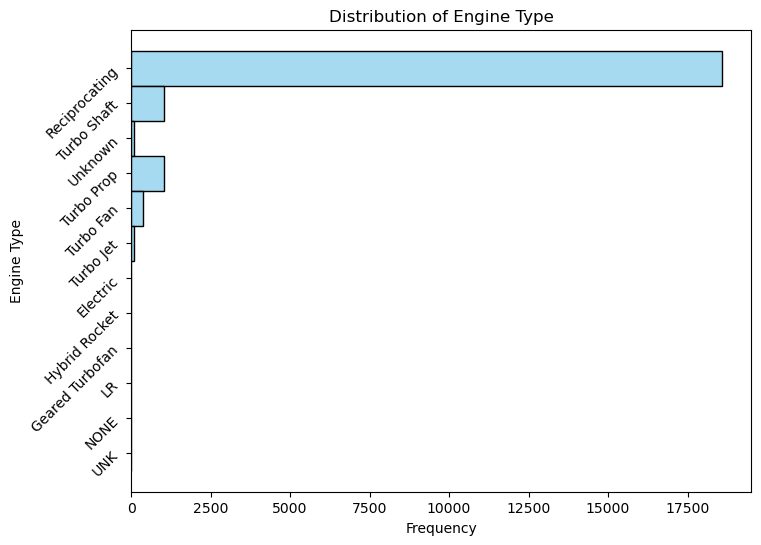

<Figure size 640x480 with 0 Axes>

In [37]:
# Filter out rows with 'None' in the Engine Type column
filtered_data = Aviation_Data[Aviation_Data['Engine.Type'] != 'None']

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_data, y='Engine.Type', color='skyblue', bins=13)
plt.title('Distribution of Engine Type')
plt.ylabel('Engine Type')
plt.yticks(rotation=45)
plt.xlabel('Frequency')
plt.show()

plt.savefig('Distribution of Engine Type.png');

Aircrafts with Reciprocating Engine Type have a high chance of being in an accident.

### e) Engine Number

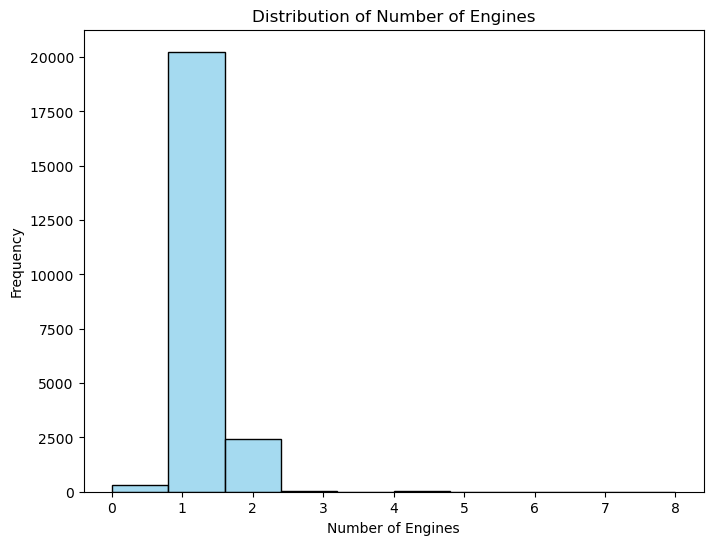

<Figure size 640x480 with 0 Axes>

In [38]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=Aviation_Data, x='Number.of.Engines', color='skyblue', bins=10)
plt.title('Distribution of Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.show()

plt.savefig('Distribution of Engine Numbers.png');

1 engine aircrafts have more counts of accidents.

### f) Flight Purpose

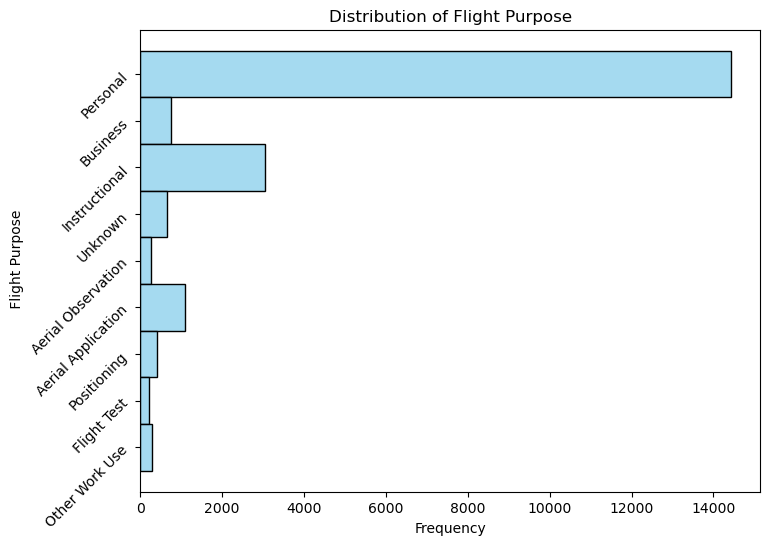

<Figure size 640x480 with 0 Axes>

In [39]:
top_10 = Aviation_Data['Purpose.of.flight'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 makes
top_10_data = Aviation_Data[Aviation_Data['Purpose.of.flight'].isin(top_10) & 
                            (Aviation_Data['Purpose.of.flight'] != 'None')]

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=top_10_data, y='Purpose.of.flight', color='skyblue', bins=10)
plt.title('Distribution of Flight Purpose')
plt.ylabel(' Flight Purpose')
plt.yticks(rotation=45)
plt.xlabel('Frequency')
plt.show()

plt.savefig('Distribution of Flight Purpose.png');

Top five flight purposes for the aircrafts that are involved in accidents are personal, instructional, aerial application, business and positioning. Since the stakeholder is looking to purchase and operate aircrafts for commercial and private enterprises this is the main variable  to be used in the bivariate analysis. 

### 4.2 Bivariate Analysis

### a) Flight Purpose and Make

<Figure size 800x600 with 0 Axes>

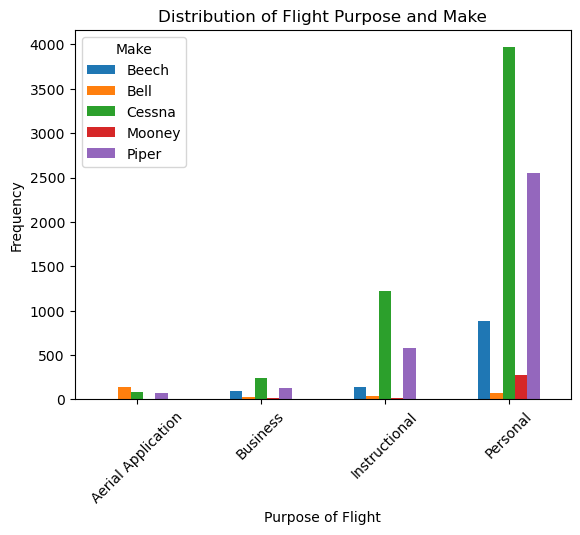

<Figure size 640x480 with 0 Axes>

In [40]:
# Get the top 5 values for 'Purpose of Flight' and 'Make'
top_5_purpose = Aviation_Data['Purpose.of.flight'].value_counts().head(5).index.tolist()
top_5_make = Aviation_Data['Make'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 values for both columns and exclude 'None'
filtered_data = Aviation_Data[(Aviation_Data['Purpose.of.flight'].isin(top_5_purpose)) & (Aviation_Data['Purpose.of.flight']
                              != 'None') & (Aviation_Data['Make'].isin(top_5_make)) & (Aviation_Data['Make'] != 'None')]

# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(filtered_data['Purpose.of.flight'], filtered_data['Make'])

# Plot a clustered bar chart
plt.figure(figsize=(8, 6))
cross_tab.plot(kind='bar', stacked=False)
plt.title('Distribution of Flight Purpose and Make')
plt.xlabel('Purpose of Flight')
plt.ylabel('Frequency')
plt.legend(title='Make')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Distribution of Flight Purpose and Make.png');

Aircrafts of the make Bell or Mooney are less prone to accidents.

### b) Flight Purpose and Aircraft Category

<Figure size 800x600 with 0 Axes>

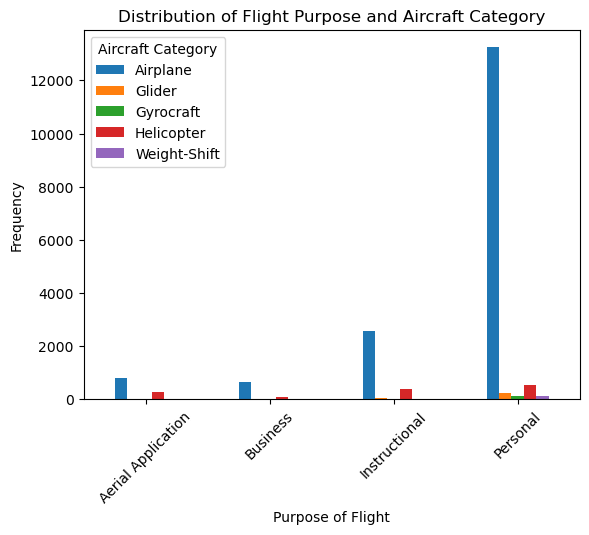

<Figure size 640x480 with 0 Axes>

In [41]:
# Get the top 5 values
top_5_purpose = Aviation_Data['Purpose.of.flight'].value_counts().head(5).index.tolist()
top_5_category = Aviation_Data['Aircraft.Category'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 values and exclude 'None
filtered_data = Aviation_Data[(Aviation_Data['Purpose.of.flight'].isin(top_5_purpose)) & (Aviation_Data['Purpose.of.flight']
                              != 'None') & (Aviation_Data['Aircraft.Category'].isin(top_5_category))]

# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(filtered_data['Purpose.of.flight'], filtered_data['Aircraft.Category'])

# Plot a clustered bar chart
plt.figure(figsize=(8, 6))
cross_tab.plot(kind='bar', stacked=False)
plt.title('Distribution of Flight Purpose and Aircraft Category')
plt.xlabel('Purpose of Flight')
plt.ylabel('Frequency')
plt.legend(title='Aircraft Category')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Distribution of Flight Purpose and Aircraft Category.png');

 A helicopter instead of an Airplane is less risky.

### c) Flight Purpose and Engine Type

<Figure size 800x600 with 0 Axes>

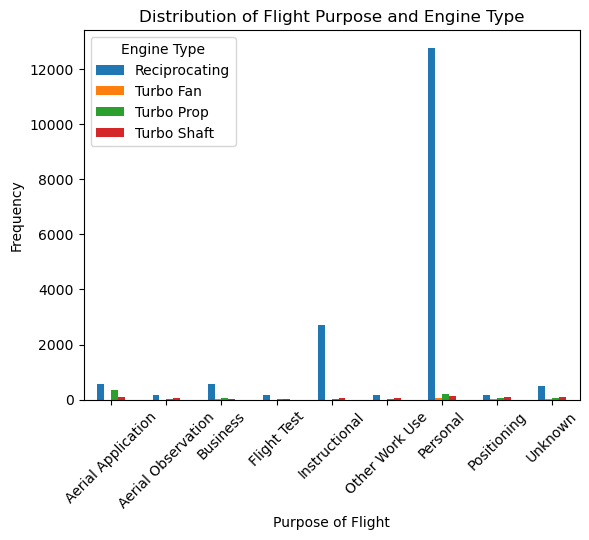

<Figure size 640x480 with 0 Axes>

In [42]:
# Get the top values for the columns
top_5_purpose = Aviation_Data['Purpose.of.flight'].value_counts().head(10).index.tolist()
top_5_type = Aviation_Data['Engine.Type'].value_counts().head(5).index.tolist()

# Filter the data to include only the top values and exclude 'None
filtered_data = Aviation_Data[(Aviation_Data['Purpose.of.flight'].isin(top_5_purpose)) & (Aviation_Data['Purpose.of.flight']
                              != 'None') & (Aviation_Data['Engine.Type'].isin(top_5_type)) & 
                              (Aviation_Data['Engine.Type'] != 'None')]

# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(filtered_data['Purpose.of.flight'], filtered_data['Engine.Type'])

# Plot a clustered bar chart
plt.figure(figsize=(8, 6))
cross_tab.plot(kind='bar', stacked=False)
plt.title('Distribution of Flight Purpose and Engine Type')
plt.xlabel('Purpose of Flight')
plt.ylabel('Frequency')
plt.legend(title='Engine Type')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Distribution of Flight Purpose and Engine Type.png');

Aircrafts with engine type of Turbo Shaft, Turbo Fan, Turbo Prop are not as prone to accidents as the reciprocating engine.

## 5. Conclusion

For data  cleaning, missing values were handled, duplicates were removed, type conversion was done and data consistency has also been ensured by making the strings in some of the columns to have similar format.

Top five flight purposes for the aircrafts that were involved in accidents was personal, instructional, aerial application, business and positioning. Since the stakeholder is looking to purchase and operate aircrafts for commercial and private enterprises this was the main variable used in the bivariate analysis. 

## 6. Recommendations

The head of the new aviation division should purchase:
1. Aircrafts of the make Bell or Mooney
2. A helicopter instead of an Airplane 
3. Aircrafts with engine type of Turbo Shaft, Turbo Fan, Turbo Prop